#  PHYSICAL MODELS OF LIVING SYSTEMS


## Homework - week 9 & 10


Author: Nguyen Xuan Tung

Id: 2005491
    

----------------------------------------------------------------------------------------------------------------------

Understand and run the code hopfield.py. Use stored images as memory patterns, and input images as initial conditions to retrieve the patterns. What pattern do you retrive if you use samir.jpg as input? And if you use superman?

Of course if you want to write your own code instead of using the one I give, is even better, but it is optional.
The files will available in our Google Drive, in a folder named Hopfield.


----------------------------------------------------------------------------------------------------------------------

The Hopfield Neural Networks, invented by Dr John J. Hopfield consists of one layer of ‘n’ fully connected recurrent neurons. It is generally used in performing auto association and optimization tasks. It is calculated using a converging interactive process and it generates a different response than our normal neural nets. 

Discrete Hopfield Network: It is a fully interconnected neural network where each unit is connected to every other unit. It behaves in a discrete manner, i.e. it gives finite distinct output, generally of two types: 

- Binary (0/1)
- Bipolar (-1/1)

The weights associated with this network is symmetric in nature and has the following properties. 

Structure & Architecture  

- Each neuron has an inverting and a non-inverting output.
- Being fully connected, the output of each neuron is an input to all other neurons but not self.

The python script "hopfield.py" has been slightly modified and transfered to run in Jupyter notebook. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import PIL.Image as Image 
import matplotlib.image as img

from matplotlib import animation, rc
from IPython.display import HTML
from celluloid import Camera

Run the code

In [2]:
# read an image and convert it to a binary pattern os size [Lx, Ly]: 
# arguments = figurename, final size=[Lx, Ly]
def readPatterns(fname, size):
    this_img = Image.open(fname) # open colour image
    this_img = this_img.convert('1') # convert image to black and white
    this_img = this_img.resize(size=[size[0],size[1]]) # resize it to have the dimensions [Lx, Ly]
    this_img.save("%s_converted.png"%fname) # save converted image

    # plot the original and the converted file
    fig = plt.figure()

    # subplot on the left - original figure
    fig.add_subplot(1,2,1)
    original = img.imread(fname)
    plt.imshow(original)
    plt.title("original")
    plt.axis('off')

    # subplot on the right - converted figure
    matrix = img.imread("%s_converted.png"%fname) # re-read from the file and convert it to a matrix of [0.,1.]
    matrix = 2*matrix-1 # convert from [0.,1.] -> [-1,1]
    fig.add_subplot(1,2,2)
    plt.matshow(matrix, cmap=plt.cm.gray,fignum=0)
    plt.axis('off')
    plt.title("simplified")
    plt.show()
    
    # Return the pattern as a 1D vector (not as a 2D a matrix)
    return matrix.flatten()
#####################################################################################

In [3]:
class HopfieldNet:
    # initialize: 
    # arguments = number of neurons, list of patterns (vector of M components, each element of the pattern has to be an array of -1,+1 of size N)
    def __init__(self, N, patterns):
        self.N = N
        self.time_elapsed = 0.
        
        self.w = np.zeros([N,N]) # weights
        self.h = np.zeros(N) # threshold functions
        
        self.s = -np.ones(N) # default configuration = s[i]=-1
        
        # HEBBIAN RULE (h_i = 0., w_{ij} = sum_{k=1,...,M} s_i^k*s_j^k / M)
        print("The network is learning...")
        self.M = len(patterns)
        for k in range(self.M):
            print("pattern ", k)
            # this is not efficient, but we could use it anyway:
            #for i in range(self.N):
                #for j in range(self.N):
                #self.w[i,j] += patterns[k][i]*patterns[k][j]/(1.*self.M)

            # it is more efficient to use built-in functions:
            self.w += np.outer(patterns[k],patterns[k])/(1.*self.M)


        print ("Done!")


        ## COMPUTE THE ENERGY - As before, I avoid loops and use efficient functions
        self.E = -0.5*np.sum(self.w) - np.sum(self.h) # energy for s_i = -1

        return

    # given and input s=[s_1,s_2,...,s_N], set the state of the network and recompute the energy
    def set_state(self, sinput):
        self.s = np.copy(sinput)

        # COMPUTE THE ENERGY - I use efficient functions rather than loops
        s2 = np.outer(self.s, self.s) # this returns a matrix s2[i,j]=s[i]*s[j]
        self.E = -0.5*np.sum(self.w*s2) + np.sum(self.h*self.s)

        return

    # evolve the state of the networks doing a number "steps" of Monte Carlo steps
    def evolve(self, steps):
        for t in range(steps):
            i = np.random.randint(self.N) # choose one node randomly

            sum_wijsj = np.sum(self.w[i,:]*self.s) # compute the argument of the activation function			
            if sum_wijsj < self.h[i]: # below the threshold
                self.s[i] = -1
            else: # above the threshold
                self.s[i] = 1

        return
#######################################################################

Reading images and converting to binary patterns...


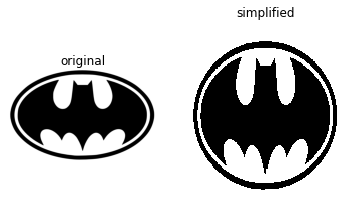

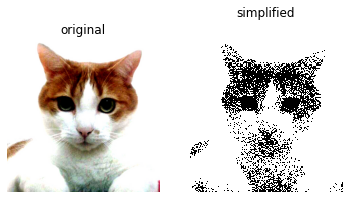

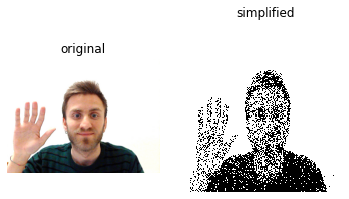

Done!


In [4]:
# dimensions of the images
Lx = Ly = 150
N = Lx*Ly # number of neurons



## STEP 1: READ THE IMAGES AND CONVERT THEM TO BINARY PATTERNS

# list of images that I want to store in my network
files = ["images/stored/batman.png", "images/stored/cat.jpg", "images/stored/jordi.jpg"]

print ("Reading images and converting to binary patterns...")
patterns = []
for fname in files:
    patterns.append(readPatterns(fname, size=[Lx,Ly]))
print ("Done!")

In [5]:
## STEP 2: CREATE THE NETWORK AND LEARN THE PREVIOUS PATTERNS
mynet = HopfieldNet(N, patterns)

The network is learning...
pattern  0
pattern  1
pattern  2
Done!


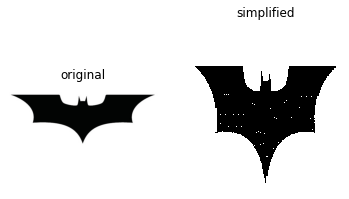

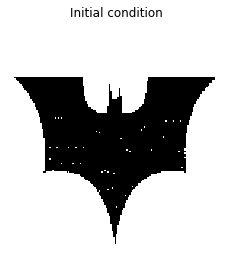

In [6]:
## STEP 3: SET ANOTHER INPUT PATTERN AS INITIAL CONDITION
newinput = readPatterns("images/inputs/batman0.png", size=[Lx,Ly]) # read the pattern from a file
mynet.set_state(newinput) # set the pattern as the initial condition of the network 
plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) # read the state (we reconvert it to a Lx*Ly matrix) and plot it
plt.title("Initial condition")
plt.axis('off')
plt.show()

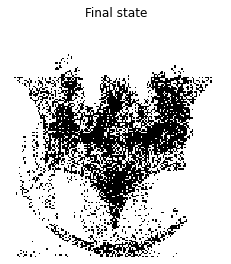

In [7]:
## STEP 4: EVOLVE THE NETWORK!
#################### ANIMATION #################################
# animation
TOTAL_FRAMES = 10 # number of frames of the animation
DT_FRAMES = 2 # duration of each frame (ms): we can accelerate or slow down the animation changing this

fig = plt.figure()
fig_mat = plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) # see more colormaps in https://matplotlib.org/examples/color/colormaps_reference.html
plt.axis('off')

# functions used to produce the animation
def animation_init(): # how to initialize the animation (if we put things here they will be fix in the animation) 
    fig_mat.set_data(np.resize(mynet.s,(Lx,Ly)))
    return fig_mat

def animation_update(i):
    mynet.evolve(steps=mynet.N//10)
    fig_mat.set_data(np.resize(mynet.s,(Lx,Ly)))
    return fig_mat

# generate the animation
for i in range(TOTAL_FRAMES):
    animation_update(i)
    ani = animation.FuncAnimation(fig, animation_update, frames=TOTAL_FRAMES, interval=DT_FRAMES, blit=False, repeat=False) # blit is used to make simulation faster
plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0)
plt.title("Final state")
plt.axis('off')
plt.show()

The network could not find the suitable pattern, the reason because of the image is a blurried verson. Since the overlap is significantly different from zero even if one image is blurried, also the input image is already very similar to the batman logo stored as a pattern and it evolves quickly to the desired pattern.

---------------------------------------------------------------------------------------------------------------------------

#### Pattern with samir.jpg inputs

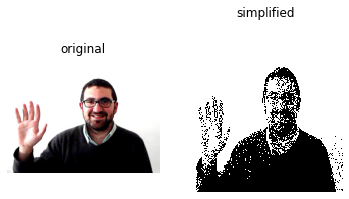

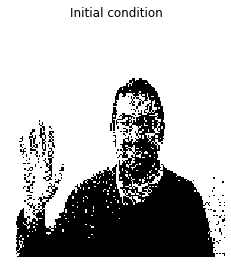

In [8]:
## SET ANOTHER INPUT PATTERN AS INITIAL CONDITION
newinput = readPatterns("images/inputs/samir.jpg", size=[Lx,Ly]) # read the pattern from a file
mynet.set_state(newinput) # set the pattern as the initial condition of the network 
plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) # read the state (we reconvert it to a Lx*Ly matrix) and plot it
plt.title("Initial condition")
plt.axis('off')
plt.show()

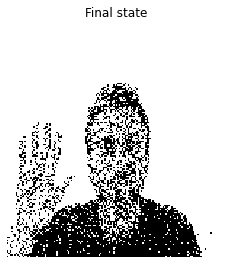

In [9]:
## EVOLVE THE NETWORK!
#################### ANIMATION #################################
# animation
TOTAL_FRAMES = 1000 # number of frames of the animation
DT_FRAMES = 10 # duration of each frame (ms): we can accelerate or slow down the animation changing this

fig = plt.figure()	
fig_mat = plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) # see more colormaps in https://matplotlib.org/examples/color/colormaps_reference.html
plt.axis('off')

# functions used to produce the animation
def animation_init(): # how to initialize the animation (if we put things here they will be fix in the animation) 
    fig_mat.set_data(np.resize(mynet.s,(Lx,Ly)))
    return fig_mat

def animation_update(i):
    mynet.evolve(steps=mynet.N//10)
    fig_mat.set_data(np.resize(mynet.s,(Lx,Ly)))
    return fig_mat

# generate the animation
for i in range(TOTAL_FRAMES):
    animation_update(i)
    ani = animation.FuncAnimation(fig, animation_update, frames=TOTAL_FRAMES, interval=DT_FRAMES, blit=False, repeat=False) # blit is used to make simulation faster
plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0)
plt.title("Final state")
plt.axis('off')
plt.show()

With samir.jpg image as an input of the network, we can see the network recalls most similar pattern, which is  jordi.jpg image (with the same hand position). We can expect that the network has sucessfully learn the patterns with human shape of raising hand. 

-----------------------------------------------------------------------------------------------------------------------

#### superman.jpg as an input

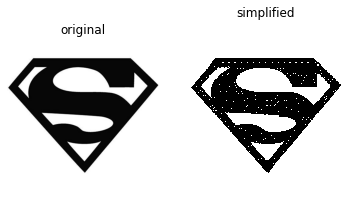

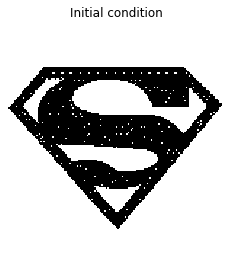

In [10]:
## SET ANOTHER INPUT PATTERN AS INITIAL CONDITION
newinput = readPatterns("images/inputs/superman.jpg", size=[Lx,Ly]) # read the pattern from a file
mynet.set_state(newinput) # set the pattern as the initial condition of the network 
plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) # read the state (we reconvert it to a Lx*Ly matrix) and plot it
plt.title("Initial condition")
plt.axis('off')
plt.show()

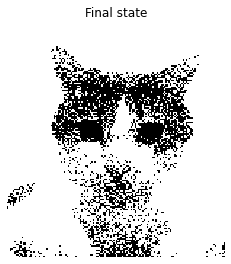

In [11]:
## EVOLVE THE NETWORK!
#################### ANIMATION #################################
# animation
TOTAL_FRAMES = 1000 # number of frames of the animation
DT_FRAMES = 10 # duration of each frame (ms): we can accelerate or slow down the animation changing this

fig = plt.figure()	
fig_mat = plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) # see more colormaps in https://matplotlib.org/examples/color/colormaps_reference.html
plt.axis('off')

# functions used to produce the animation
def animation_init(): # how to initialize the animation (if we put things here they will be fix in the animation) 
    fig_mat.set_data(np.resize(mynet.s,(Lx,Ly)))
    return fig_mat

def animation_update(i):
    mynet.evolve(steps=mynet.N//10)
    fig_mat.set_data(np.resize(mynet.s,(Lx,Ly)))
    return fig_mat

# generate the animation
for i in range(TOTAL_FRAMES):
    animation_update(i)
    ani = animation.FuncAnimation(fig, animation_update, frames=TOTAL_FRAMES, interval=DT_FRAMES, blit=False, repeat=False) # blit is used to make simulation faster
plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0)
plt.title("Final state")
plt.axis('off')
plt.show()

We can see as superman image as input that the network recalls the most similar pattern that is had stored previously which is the cat image. 

-------------------------------------------------------------------------------------------------------------------

#### cat3.jpg as an input

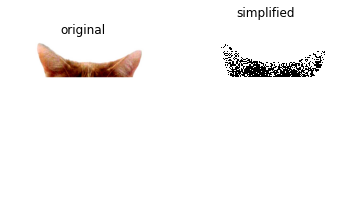

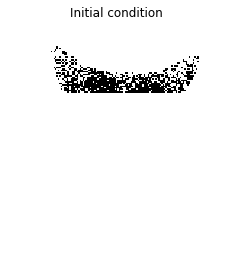

In [12]:
## SET ANOTHER INPUT PATTERN AS INITIAL CONDITION
newinput = readPatterns("images/inputs/cat3.jpg", size=[Lx,Ly]) # read the pattern from a file
mynet.set_state(newinput) # set the pattern as the initial condition of the network 
plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) # read the state (we reconvert it to a Lx*Ly matrix) and plot it
plt.title("Initial condition")
plt.axis('off')
plt.show()

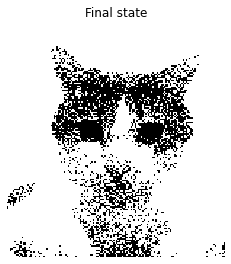

In [13]:
## EVOLVE THE NETWORK!
#################### ANIMATION #################################
# animation
TOTAL_FRAMES = 1000 # number of frames of the animation
DT_FRAMES = 10 # duration of each frame (ms): we can accelerate or slow down the animation changing this

fig = plt.figure()	
fig_mat = plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) # see more colormaps in https://matplotlib.org/examples/color/colormaps_reference.html
plt.axis('off')

# functions used to produce the animation
def animation_init(): # how to initialize the animation (if we put things here they will be fix in the animation) 
    fig_mat.set_data(np.resize(mynet.s,(Lx,Ly)))
    return fig_mat

def animation_update(i):
    mynet.evolve(steps=mynet.N//10)
    fig_mat.set_data(np.resize(mynet.s,(Lx,Ly)))
    return fig_mat

# generate the animation
for i in range(TOTAL_FRAMES):
    animation_update(i)
    ani = animation.FuncAnimation(fig, animation_update, frames=TOTAL_FRAMES, interval=DT_FRAMES, blit=False, repeat=True) # blit is used to make simulation faster
plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0)
plt.title("Final state")
plt.axis('off')
plt.show()

The network has found the correct pattern, in this case the cat image. We can see that the update changes the portion of the original image is denied and the evolved image starts to match the stored patterns. If we use the image "cat2.jpg" (another piece of the original cat image) the same result will be given. 

---------------------------------------------------------------------------------------------------------------------

####  tung.jpg as an input

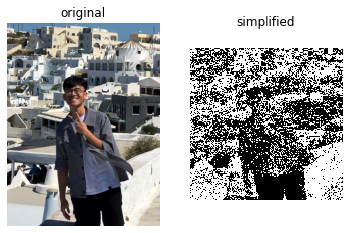

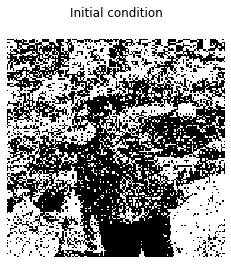

In [15]:
## SET ANOTHER INPUT PATTERN AS INITIAL CONDITION
newinput = readPatterns("images/inputs/tung.jpg", size=[Lx,Ly]) # read the pattern from a file
mynet.set_state(newinput) # set the pattern as the initial condition of the network 
plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) # read the state (we reconvert it to a Lx*Ly matrix) and plot it
plt.title("Initial condition")
plt.axis('off')
plt.show()

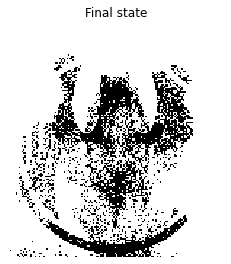

In [16]:
## EVOLVE THE NETWORK!
#################### ANIMATION #################################
# animation
TOTAL_FRAMES = 1000 # number of frames of the animation
DT_FRAMES = 10 # duration of each frame (ms): we can accelerate or slow down the animation changing this

fig = plt.figure()	
fig_mat = plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) # see more colormaps in https://matplotlib.org/examples/color/colormaps_reference.html
plt.axis('off')

# functions used to produce the animation
def animation_init(): # how to initialize the animation (if we put things here they will be fix in the animation) 
    fig_mat.set_data(np.resize(mynet.s,(Lx,Ly)))
    return fig_mat

def animation_update(i):
    mynet.evolve(steps=mynet.N//10)
    fig_mat.set_data(np.resize(mynet.s,(Lx,Ly)))
    return fig_mat

# generate the animation
for i in range(TOTAL_FRAMES):
    animation_update(i)
    ani = animation.FuncAnimation(fig, animation_update, frames=TOTAL_FRAMES, interval=DT_FRAMES, blit=False, repeat=True) # blit is used to make simulation faster
plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0)
plt.title("Final state")
plt.axis('off')
plt.show()

The result is similar to the batman input. The result is close to the batman logo which means the most important feature in the image is the back ground patterns. Then the network recognizes the patterns and tries to recall the stored pattern in memory. 